In [241]:
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [242]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [243]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

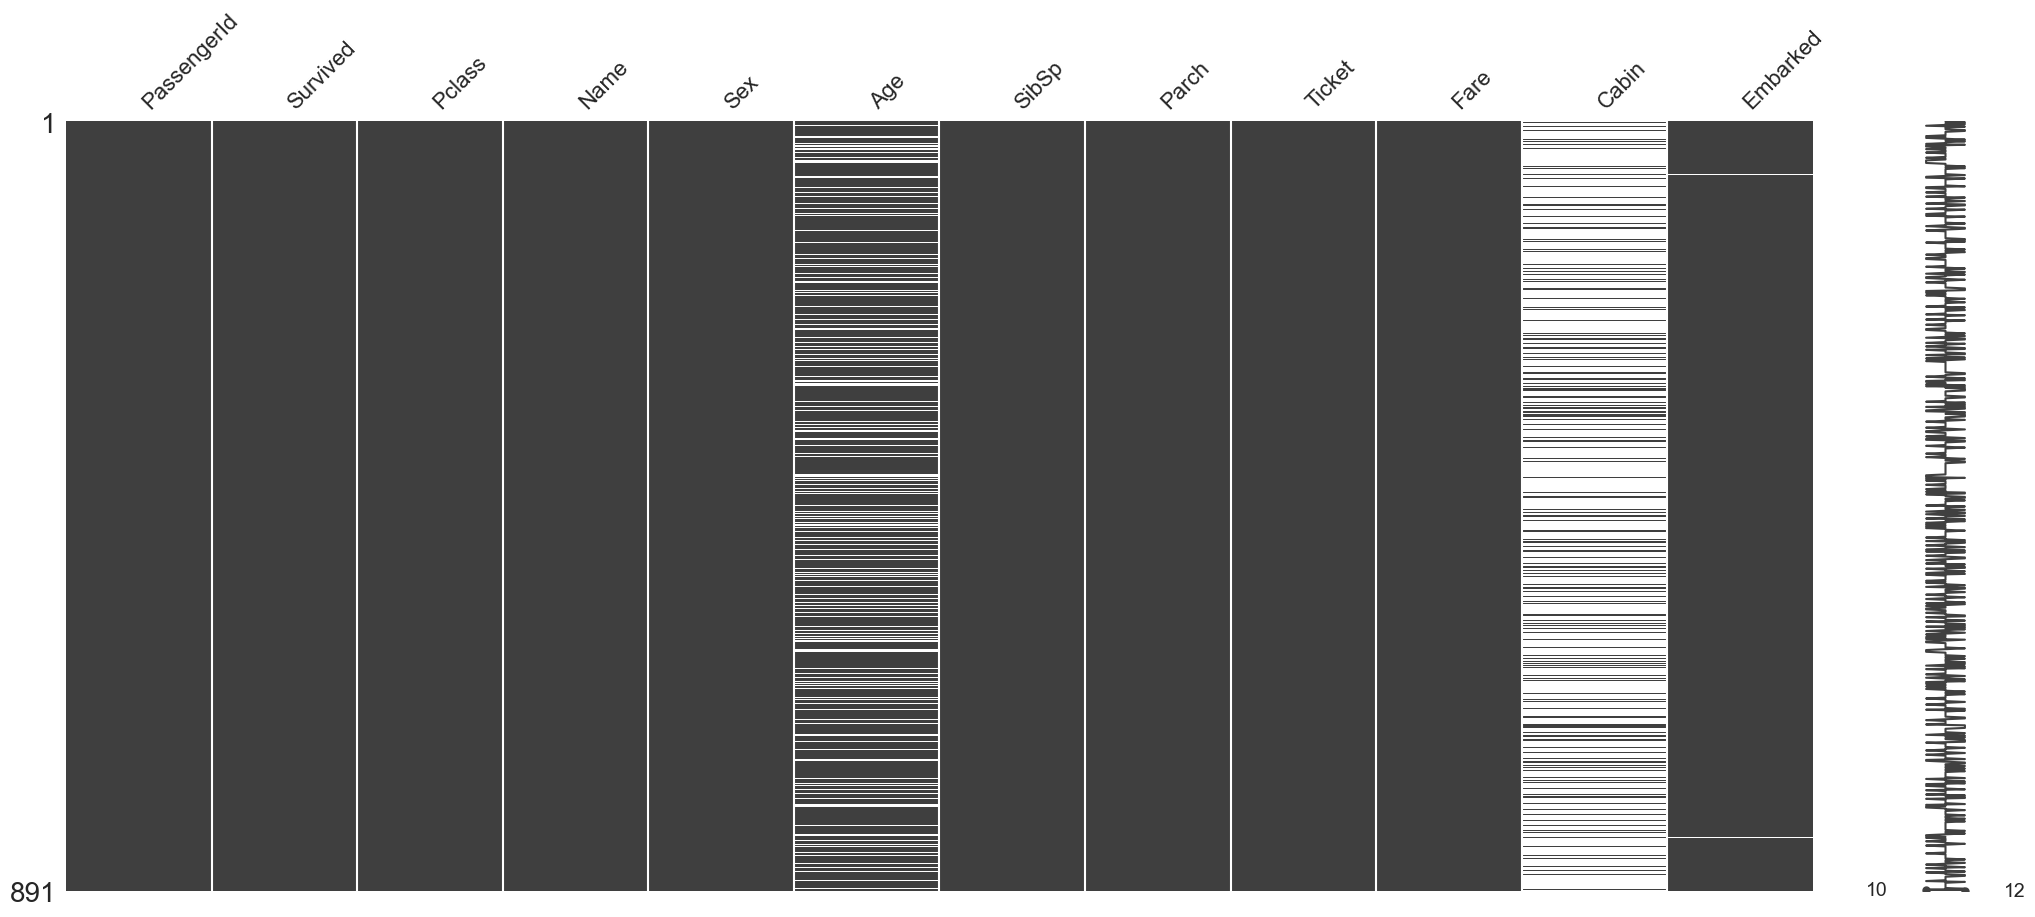

In [244]:
msno.matrix(titanic_train)

<Axes: xlabel='Survived', ylabel='count'>

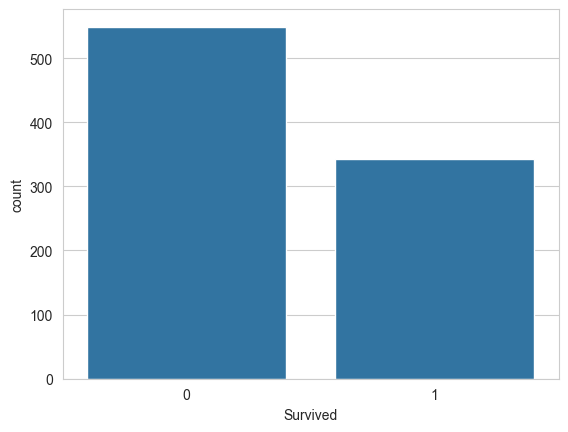

In [245]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_train)

<Axes: xlabel='Survived', ylabel='count'>

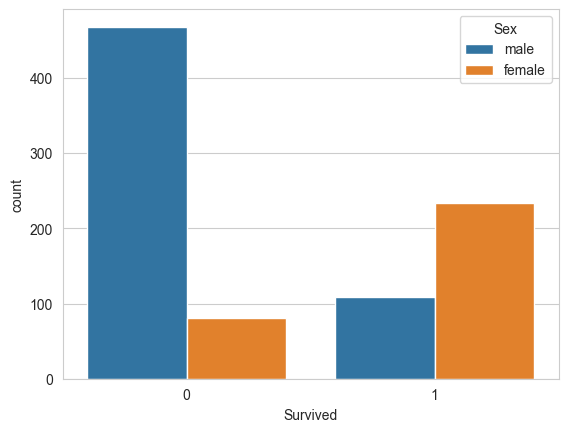

In [246]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic_train)

<Axes: xlabel='Survived', ylabel='count'>

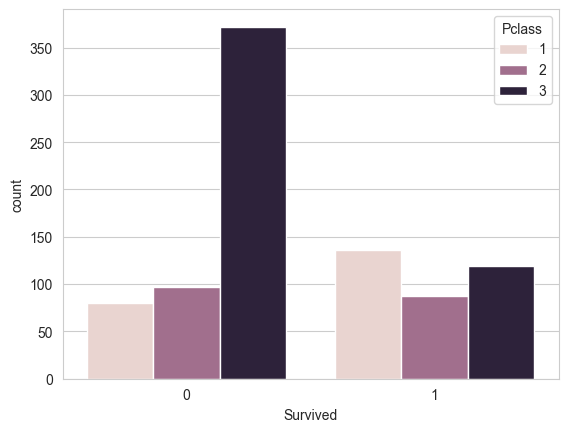

In [247]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_train)

C:\Users\Panji Satrio\AppData\Local\Temp\ipykernel_24832\2195158977.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_train['Age'].dropna(),bins=30)


<Axes: xlabel='Age', ylabel='Density'>

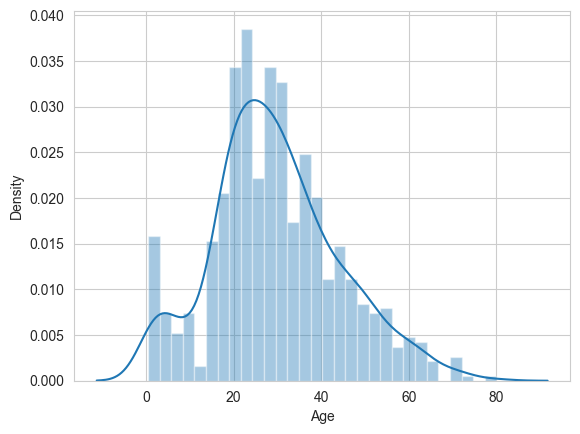

In [248]:
sns.distplot(titanic_train['Age'].dropna(),bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

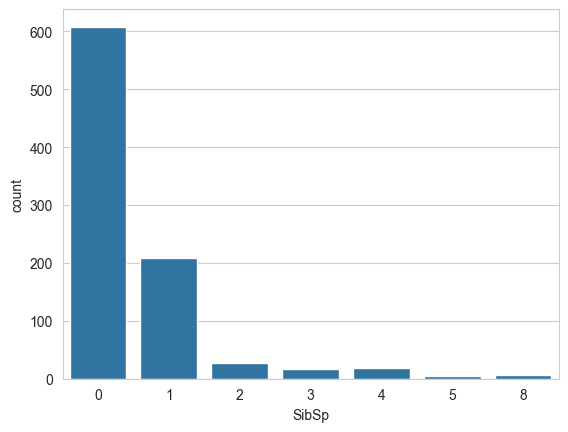

In [249]:
sns.countplot(x='SibSp',data=titanic_train)

<Axes: >

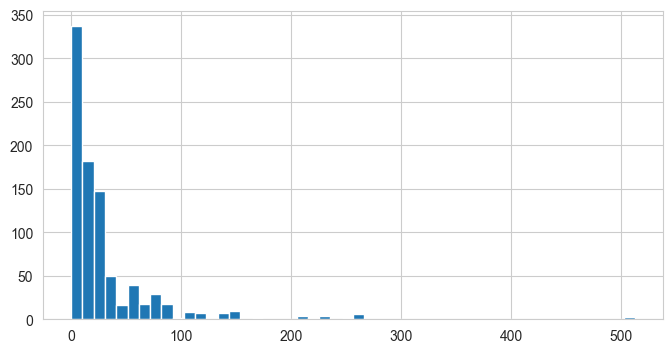

In [250]:
titanic_train['Fare'].hist(bins=50,figsize=(8,4))

<Axes: xlabel='Pclass', ylabel='Age'>

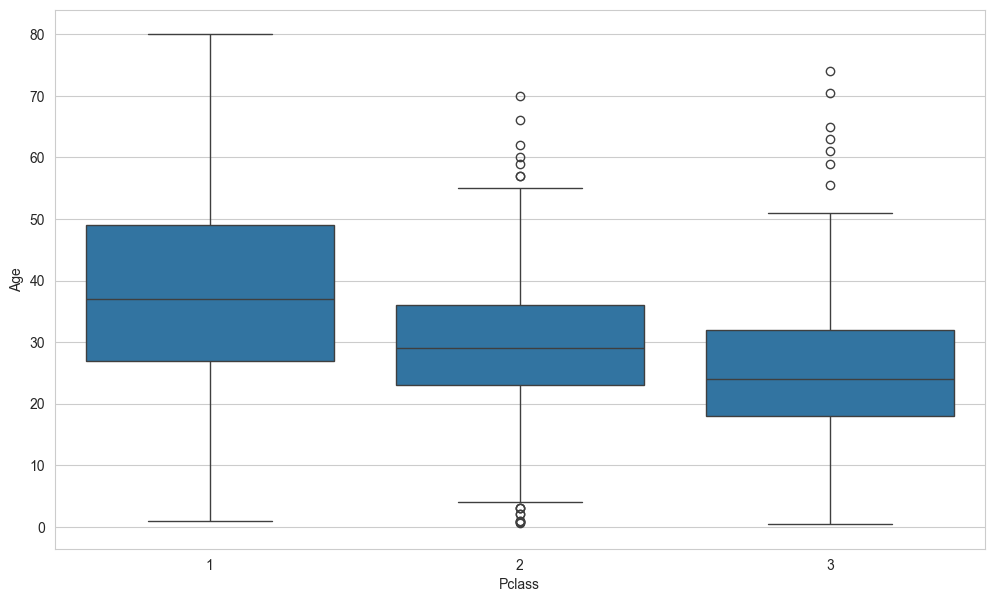

In [251]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_train)

In [252]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [253]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\Panji Satrio\AppData\Local\Temp\ipykernel_24832\822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Panji Satrio\AppData\Local\Temp\ipykernel_24832\822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

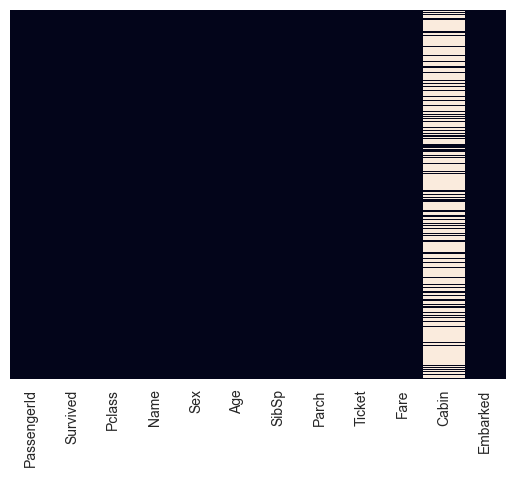

In [254]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False)

In [255]:

titanic_train.drop('Cabin',axis=1,inplace=True)

titanic_train.head()

titanic_train.dropna(inplace=True)

In [256]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [264]:
# sex = pd.get_dummies(titanic_train['Sex'],drop_first=True)
# embark = pd.get_dummies(titanic_train['Embarked'],drop_first=True)

titanic_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [265]:
titanic_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [268]:
train = pd.concat([titanic_train,sex,embark],axis=1)

In [269]:
X_train, X_test, y_train, y_test = train_test_split(titanic_train.drop('Survived',axis=1), 
                                                    titanic_train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [270]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 807 to 865
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  622 non-null    int64  
 1   Pclass       622 non-null    int64  
 2   Age          622 non-null    float64
 3   SibSp        622 non-null    int64  
 4   Parch        622 non-null    int64  
 5   Fare         622 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 34.0 KB


In [272]:
from sklearn.metrics import classification_report

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       163
           1       0.71      0.49      0.58       104

    accuracy                           0.72       267
   macro avg       0.72      0.68      0.69       267
weighted avg       0.72      0.72      0.71       267

